In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

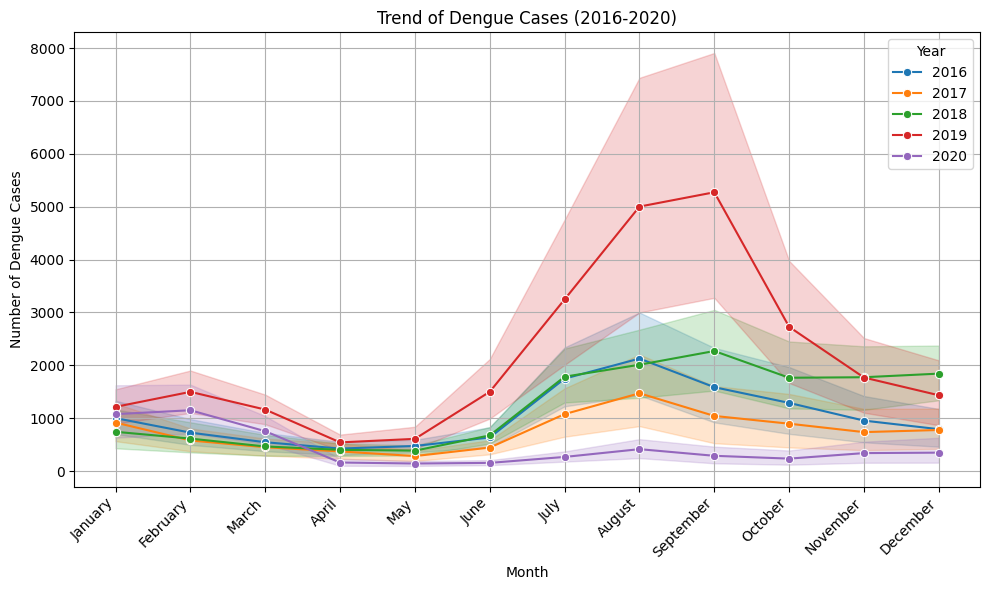

In [4]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
# plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o', palette='tab10')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.gcf().set_size_inches(10,6)
plt.tight_layout()
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 1 :</strong> During 2019, the Philippines faced a major dengue outbreak that intensified between May and September, coinciding with the rainy season. Reported cases surged from over 100,000 in June to more than 270,000 by August, prompting the Department of Health to declare a national dengue epidemic. The regions most affected included Western Visayas, Calabarzon, and Central Visayas, with children comprising many of the fatalities. Factors such as heavy rainfall, poor sanitation, mosquito breeding sites, changing dengue virus serotypes, and lingering effects of vaccine hesitancy contributed to the rapid spread.</p>

<p style = 'font-size: 16px;'><strong>INSIGHT 2 :</strong> Based on the information from the Department of Science and Technology – Philippine Council for Health Research and Development (DOST-PCHRD), dengue cases in the Philippines typically rise during the rainy season, which usually begins in May and peaks between June and August. This trend highlights how increased rainfall and stagnant water provide ideal breeding grounds for Aedes mosquitoes, the primary carriers of the dengue virus. Therefore, this period serves as a critical time for intensified public awareness, community clean-up efforts, and preventive measures to reduce mosquito breeding sites and control the spread of dengue.</p>

<p style = 'font-size: 16px;'><strong>INSIGHT 3 :</strong> According to a study in the Philippines, during 2020 there was a substantial drop (roughly 70–90%) in reported dengue cases during the usual peak rainy season weeks. The reduction is attributed not only to public-health measures for COVID‑19 (such as lockdowns and reduced mobility) which likely curtailed mosquito-transmission opportunities, but also possibly to reduced health-seeking and reporting to prevent further spreads of the virus.</p>

<h1 style='color:red;'>Mapping each regions to their Island Groups</h1>

In [5]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [6]:
# Define mapping of Regions to Island Groups
region_to_island = {
    'NCR': 'Luzon',
    'CAR': 'Luzon',
    'Region I': 'Luzon',
    'Region II': 'Luzon',
    'Region III': 'Luzon',
    'Region IV-A': 'Luzon',
    'Region IV-B': 'Luzon',
    'Region V': 'Luzon',
    'Region VI': 'Visayas',
    'Region VII': 'Visayas',
    'Region VIII': 'Visayas',
    'Region IX': 'Mindanao',
    'Region X': 'Mindanao',
    'Region XI': 'Mindanao',
    'Region XII': 'Mindanao',
    'Region XIII': 'Mindanao',
    'BARMM': 'Mindanao'
}

# Create a new column in your dataframe
dengue['Island_Group'] = dengue['Region'].map(region_to_island)

# Check the new dataframe
dengue[dengue['Island_Group'] == 'Luzon']

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island_Group
0,January,2016,Region I,705,1,Luzon
1,February,2016,Region I,374,0,Luzon
2,March,2016,Region I,276,0,Luzon
3,April,2016,Region I,240,2,Luzon
4,May,2016,Region I,243,1,Luzon
...,...,...,...,...,...,...
955,August,2020,CAR,72,0,Luzon
956,September,2020,CAR,39,26,Luzon
957,October,2020,CAR,40,28,Luzon
958,November,2020,CAR,38,15,Luzon


In [7]:
dengue.groupby('Island_Group')['Dengue_Cases'].sum()

Island_Group
Luzon       597864
Mindanao    269372
Visayas     280189
Name: Dengue_Cases, dtype: int64

In [8]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
Island_Group       object
dtype: object

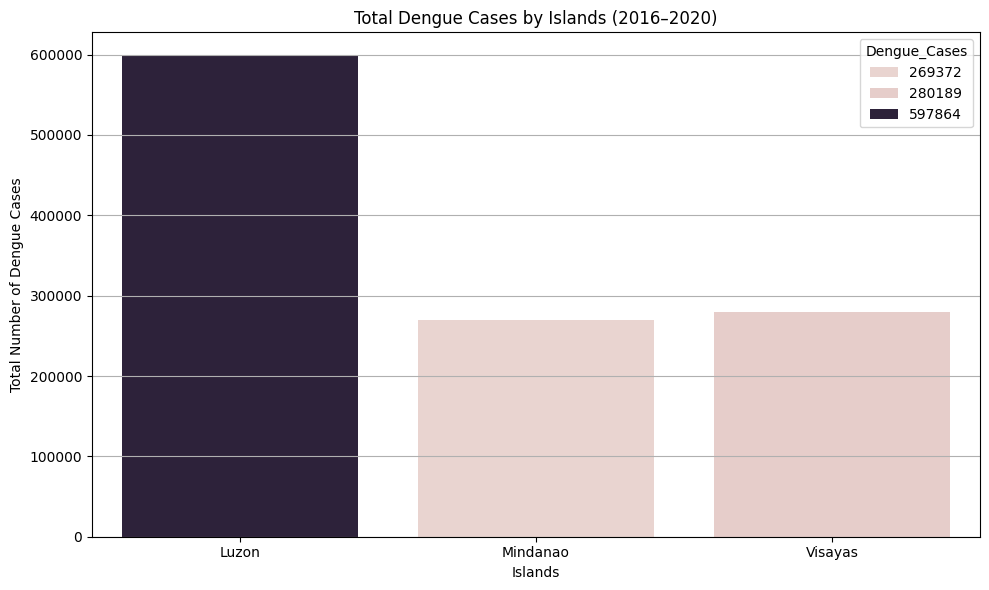

In [9]:
# Aggregate dengue cases by island group
island_cases = dengue.groupby('Island_Group')['Dengue_Cases'].sum().reset_index()

# Create bar plot
sns.barplot(data=island_cases, x='Island_Group', y='Dengue_Cases', hue='Dengue_Cases')
plt.title('Total Dengue Cases by Islands (2016–2020)')
plt.xlabel('Islands')
plt.ylabel('Total Number of Dengue Cases')
plt.grid(axis='y')
plt.gcf().set_size_inches(10,6)
plt.tight_layout()
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 4 :</strong> In Luzon, especially in dense urban zones like Metro Manila, dengue case numbers are among the highest not simply because of inadequate prevention, but because of underlying structural factors high population density, many transport hubs (which increase human movement), small‐building housing layouts, and mixed vegetation/building land use. These create environments conducive to the mosquito vector and virus transmission.</p>

<p style = 'font-size: 16px;'><strong>INSIGHT 5 :</strong> From 2016 to 2020, data show that the Visayas and Mindanao regions recorded fewer reported dengue cases compared to Luzon. One possible explanation is that healthcare access in some rural and geographically isolated areas remains limited, leading to potential underreporting of dengue cases. Many communities in these islands face challenges such as distance from health facilities, limited diagnostic capacity, and fewer surveillance systems, which may cause actual dengue incidence to be higher than reported.</p>

<h1 style='color:red;'>Identifying the most affected regions in 2019</h1>

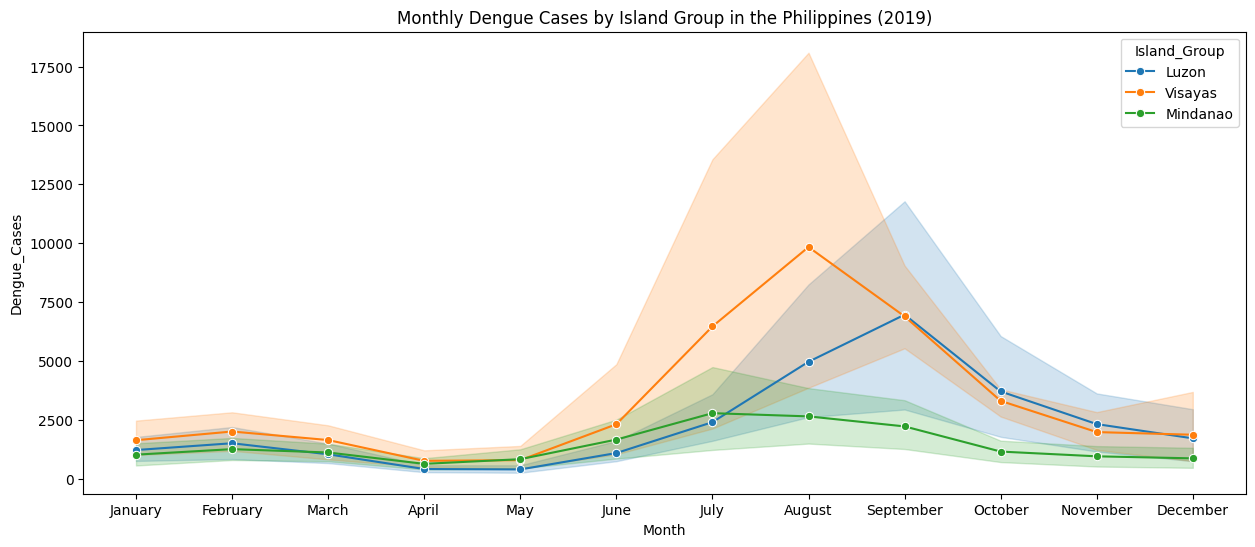

In [10]:
sns.lineplot(
    data=dengue[dengue['Year'] == 2019],
    x='Month', y='Dengue_Cases',
    hue='Island_Group', marker='o'
)
plt.gcf().set_size_inches(15,6)
plt.title("Monthly Dengue Cases by Island Group in the Philippines (2019)")
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 6 :</strong> In 2019, the Visayas region recorded the highest dengue cases in the Philippines, contributing significantly to the national epidemic. The rapid surge, particularly in Western Visayas, led the DOH to declare a national dengue epidemic in August 2019, with nearly half of the deaths occurring in children under nine years old.</p>

In [11]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
Island_Group       object
dtype: object

In [12]:
dengue_visayas = dengue[(dengue['Year'] == 2019) & (dengue['Island_Group'] == 'Visayas')]
dengue_visayas

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island_Group
396,January,2019,Region VI,1426,10,Visayas
397,February,2019,Region VI,2003,8,Visayas
398,March,2019,Region VI,2262,19,Visayas
399,April,2019,Region VI,1199,7,Visayas
400,May,2019,Region VI,1386,9,Visayas
401,June,2019,Region VI,4859,31,Visayas
402,July,2019,Region VI,13564,48,Visayas
403,August,2019,Region VI,18090,54,Visayas
404,September,2019,Region VI,9048,32,Visayas
405,October,2019,Region VI,3475,8,Visayas


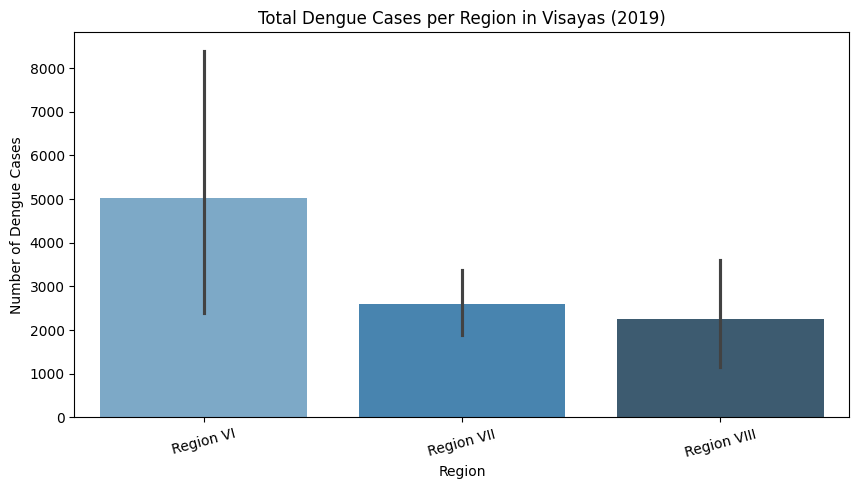

In [13]:
sns.barplot(
    data=dengue_visayas,
    x='Region',
    y='Dengue_Cases',
    palette='Blues_d'
)
plt.title('Total Dengue Cases per Region in Visayas (2019)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=15)
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 7 :</strong> In 2019, Western Visayas (Region VI) recorded the highest number of dengue cases in the Visayas, marking one of the most severe regional outbreaks during that year. According to reports from the Philippine News Agency (PNA, 2019), the region logged over 15,700 dengue cases and 87 deaths by early July representing a 236% increase compared to the same period in 2018. This alarming rise prompted the declaration of a dengue outbreak across most of the region, excluding Negros Occidental, as local governments struggled to control the spread.
<br><br>
The spike in dengue cases may be attributed to multiple factors, including environmental conditions conducive to mosquito breeding, limited healthcare capacity, and delays in community-level intervention. In some areas, health centers experienced shortages of testing kits and medical supplies, while hospitals faced increased patient admissions due to severe dengue cases.</p>

In [14]:
dengue_luzon = dengue[(dengue['Year'] == 2019) & (dengue['Island_Group'] == 'Luzon')]
dengue_luzon

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island_Group
36,January,2019,Region I,596,2,Luzon
37,February,2019,Region I,633,1,Luzon
38,March,2019,Region I,399,0,Luzon
39,April,2019,Region I,183,1,Luzon
40,May,2019,Region I,197,1,Luzon
...,...,...,...,...,...,...
943,August,2019,CAR,1536,6,Luzon
944,September,2019,CAR,1472,5,Luzon
945,October,2019,CAR,992,1,Luzon
946,November,2019,CAR,756,4,Luzon


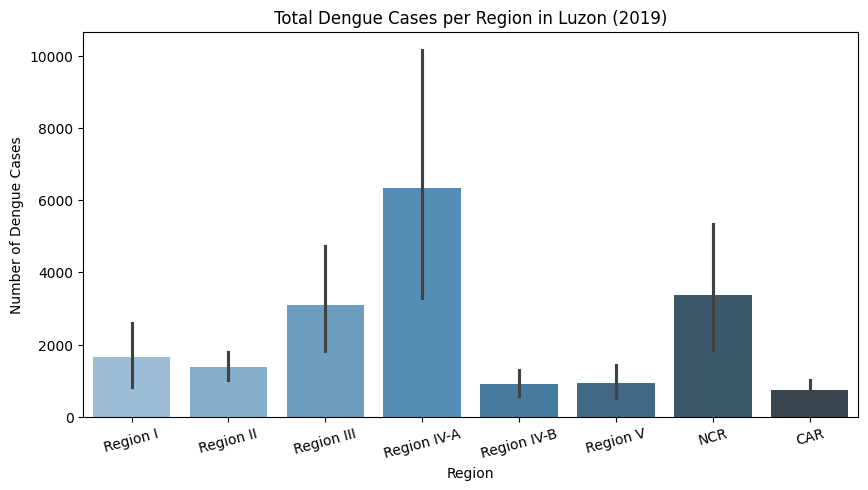

In [15]:
sns.barplot(
    data=dengue_luzon,
    x='Region',
    y='Dengue_Cases',
    palette='Blues_d'
)
plt.title('Total Dengue Cases per Region in Luzon (2019)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=15)
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 8 :</strong> In 2019, Region IV-A (Calabarzon) emerged as one of the the top hotspots for dengue cases in the Philippines, contributing the largest share of regional dengue incidence during the that dengue epidemic. Statistical analysis shows that among all the regions, Calabarzon had the highest number of reported dengue cases.</p>

In [16]:
dengue_mindanao = dengue[(dengue['Year'] == 2019) & (dengue['Island_Group'] == 'Mindanao')]
dengue_mindanao

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island_Group
576,January,2019,Region IX,775,7,Mindanao
577,February,2019,Region IX,1003,5,Mindanao
578,March,2019,Region IX,1105,10,Mindanao
579,April,2019,Region IX,948,11,Mindanao
580,May,2019,Region IX,1602,8,Mindanao
...,...,...,...,...,...,...
1003,August,2019,BARMM,811,6,Mindanao
1004,September,2019,BARMM,807,2,Mindanao
1005,October,2019,BARMM,481,2,Mindanao
1006,November,2019,BARMM,362,0,Mindanao


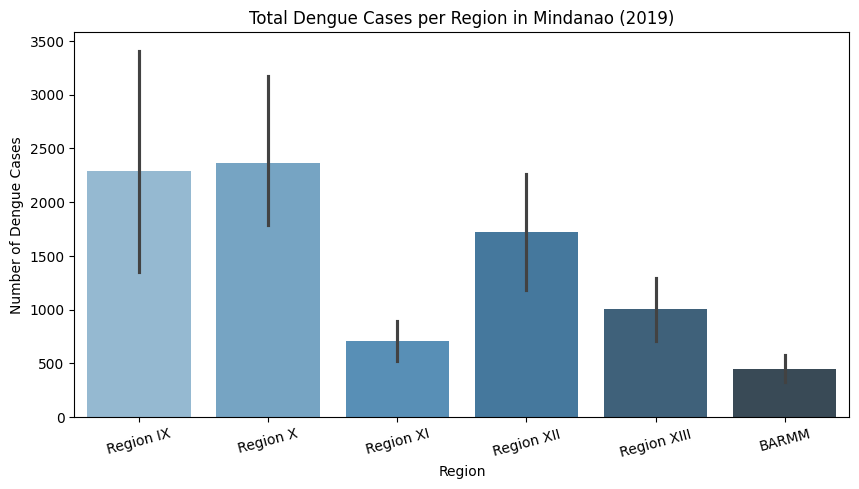

In [17]:
sns.barplot(
    data=dengue_mindanao,
    x='Region',
    y='Dengue_Cases',
    palette='Blues_d'
)
plt.title('Total Dengue Cases per Region in Mindanao (2019)')
plt.xlabel('Region')
plt.ylabel('Number of Dengue Cases')
plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=15)
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 9 :</strong> According to the 2019 dengue situation report, Regions IX (Zamboanga Peninsula) and X (Northern Mindanao) recorded the highest number of dengue cases in Mindanao, while the Bangsamoro Autonomous Region in Muslim Mindanao (BARMM) had the lowest. This pattern suggests uneven dengue transmission across Mindanao, possibly linked to differences in population density, local health response, and disease surveillance systems.</p>

<h1 style='color:red;'> Mortality Rate per each Region </h1>

In [18]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [19]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


In [20]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
Island_Group       object
dtype: object

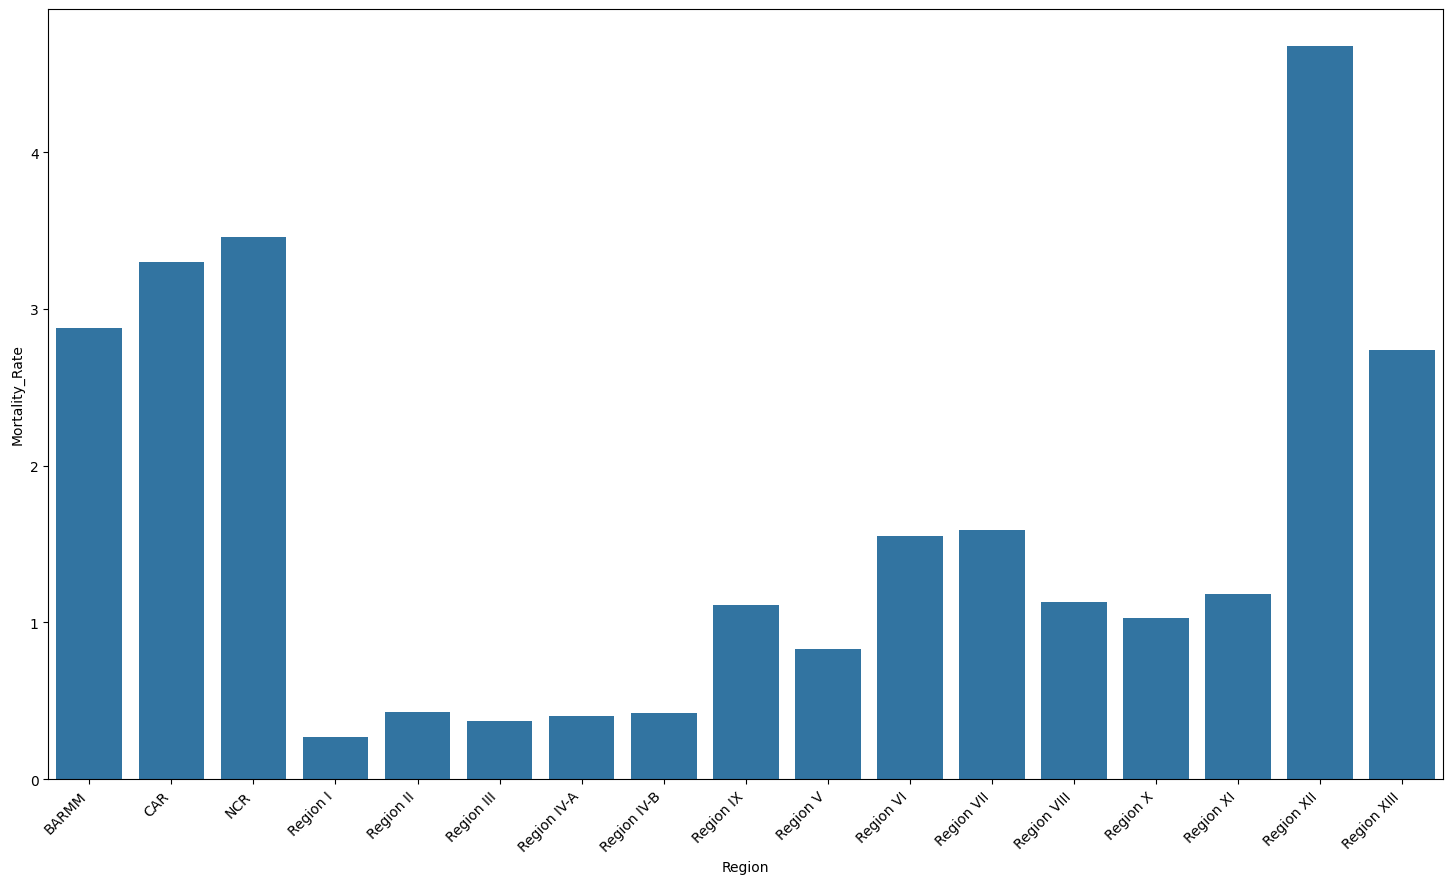

In [21]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=45, ha='right')
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 10 :</strong> As we can see from the data, Region XII (SOCCSKSARGEN) recorded the highest dengue mortality rate among all regions from 2016 to 2020, making it a serious public health concern. The consistently high fatality rate in this region indicates possible gaps in early diagnosis, access to healthcare services, and community awareness about dengue prevention and treatment. Limited medical resources, delayed hospital admissions, and inadequate vector control programs may have contributed to the elevated number of deaths despite lower case counts compared to other regions.</p>

In [22]:
dengue_visayass = dengue[dengue['Island_Group'] == 'Mindanao']
dengue_visayass['Region'].unique()

array(['Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII',
       'BARMM'], dtype=object)

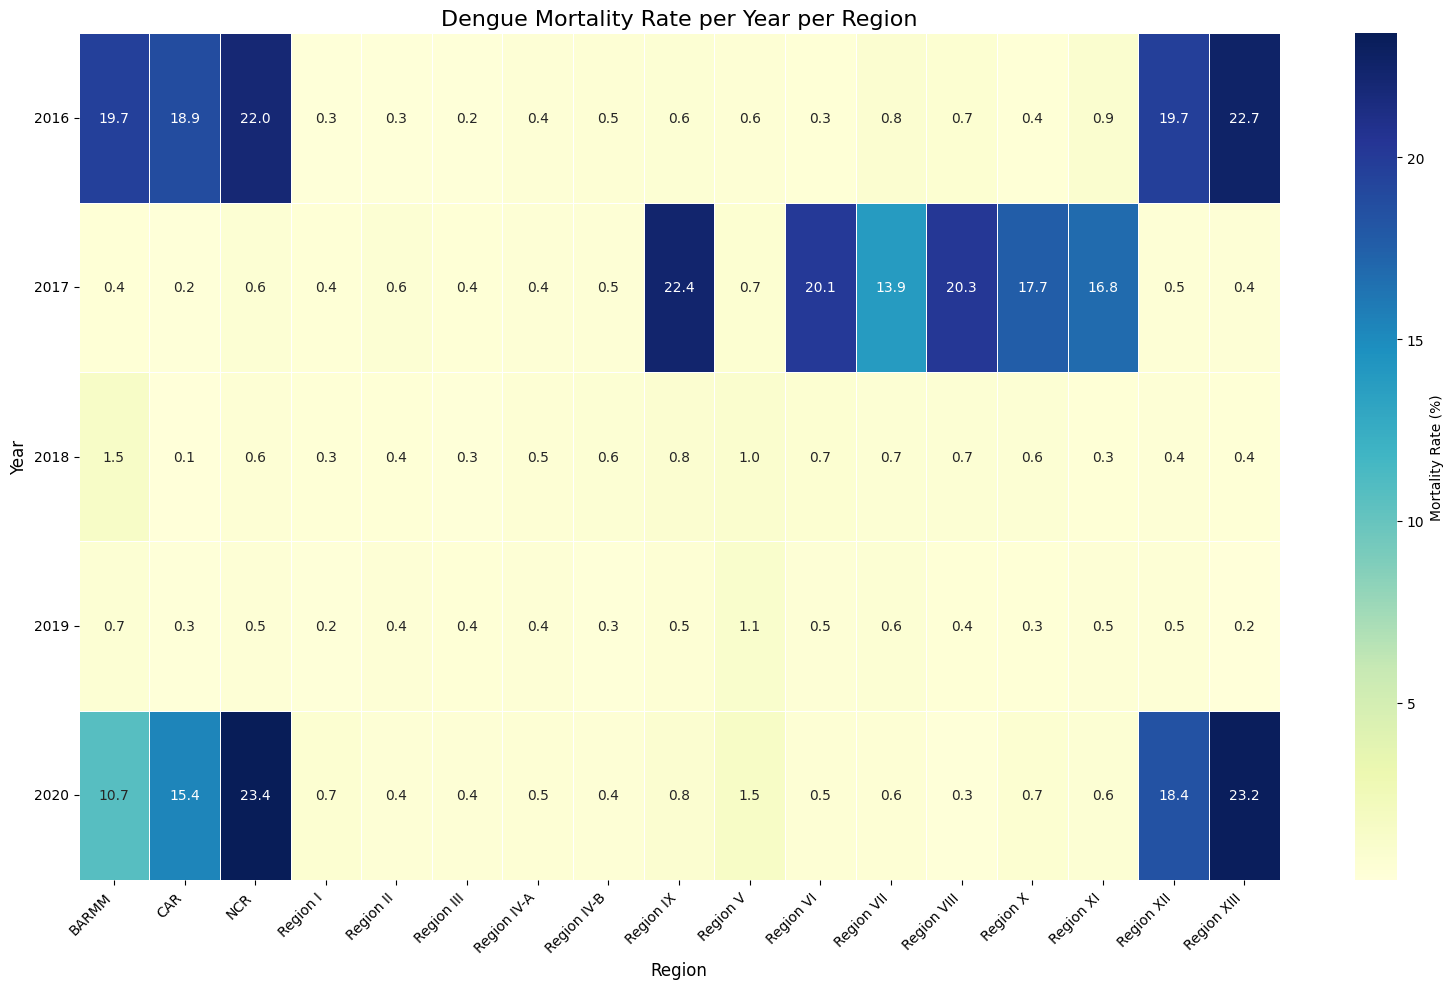

In [23]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

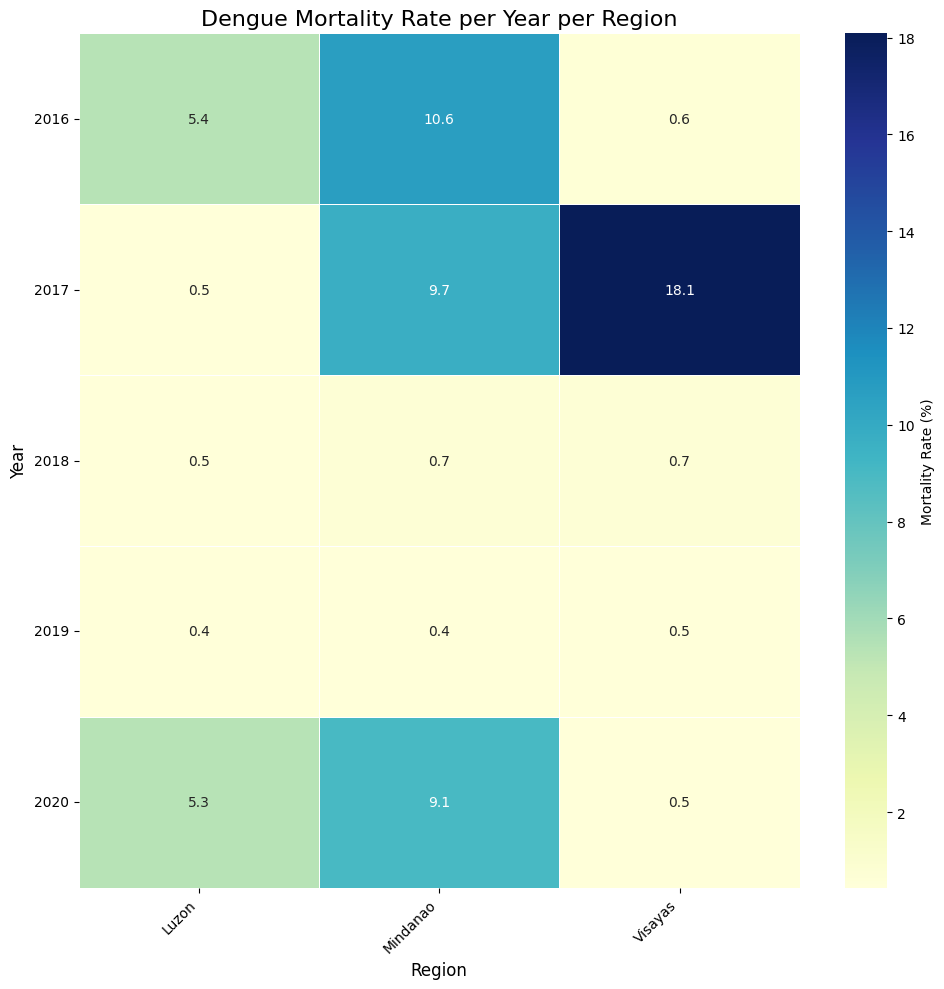

In [24]:
dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Island_Group'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<p style = 'font-size: 16px;'><strong>INSIGHT 11 :</strong> Even though the island of Luzon reports many dengue cases (because of larger population, higher urbanization, better surveillance, etc.), its mortality rate is comparatively lower. In contrast, islands such as Mindanao show fewer reported dengue cases but a higher mortality rate. This suggests that while Luzon may capture many cases (including mild or moderate ones), other regions with weaker healthcare infrastructure, delayed diagnosis or treatment, or weaker surveillance may see more severe outcomes per case.</p>